# Técnicas de I.A. aplicadas na Bolsa de Valores

## Grupo 7
**Igor Trevelin Xavier da Silva - 10135354 <br>**
**Mauricio Caetano da Silva - 9040996 <br>**
**Vitor Trevelin Xavier da Silva - 9791285 <br>**

## Bibliotecas Utilizadas

In [17]:
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np

## Funções

In [18]:
def load_data(st_name):
    st_name += '.csv'
    data = pd.read_csv(st_name, sep='\t')
    return data

## Leitura da base - Pré processamento

In [19]:
st_name = 'PETR4'
name = 'Petrobras'
dataset = load_data(st_name)
    
# Remove os caracteres especiais das colunas da tabela
dataset.columns = dataset.columns.str.replace('<','')
dataset.columns = dataset.columns.str.replace('>','')

# Transforma o tipo da coluna DATE para ser reconhecido pelo pandas
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

print(name.upper()+' - '+st_name)

# Mostra apenas as 10 primeiras linhas
dataset.head(n=10)

PETROBRAS - PETR4


,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2008-10-06,21.66,23.15,19.07,22.88,28526,36376500,1
1,2008-10-07,22.66,23.61,20.83,21.59,28832,33356100,1
2,2008-10-08,20.37,22.12,19.75,20.37,38587,53174600,1
3,2008-10-09,21.66,21.74,19.54,19.74,32009,43196800,1
4,2008-10-10,17.55,19.11,17.47,18.31,35381,48646500,1
5,2008-10-13,20.06,20.52,18.93,20.52,32057,39591600,1
6,2008-10-14,21.66,22.12,20.09,20.83,36756,46780000,1
7,2008-10-15,19.83,19.99,17.48,18.31,42588,52918700,1
8,2008-10-16,18.32,18.46,16.10,16.93,42140,53712100,1
9,2008-10-17,17.12,18.39,16.40,17.54,31553,38225200,1


## Remoção de colunas não interessantes

In [20]:
# Remove colunas não interessantes da tabela
dataset_clean = dataset.drop(['TICKVOL', 'SPREAD'], axis=1)

# Mostra apenas as 10 primeiras linhas
dataset_clean.head(n=10)

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2008-10-06,21.66,23.15,19.07,22.88,36376500
1,2008-10-07,22.66,23.61,20.83,21.59,33356100
2,2008-10-08,20.37,22.12,19.75,20.37,53174600
3,2008-10-09,21.66,21.74,19.54,19.74,43196800
4,2008-10-10,17.55,19.11,17.47,18.31,48646500
5,2008-10-13,20.06,20.52,18.93,20.52,39591600
6,2008-10-14,21.66,22.12,20.09,20.83,46780000
7,2008-10-15,19.83,19.99,17.48,18.31,52918700
8,2008-10-16,18.32,18.46,16.10,16.93,53712100
9,2008-10-17,17.12,18.39,16.40,17.54,38225200


## Estatísticas descritivas - Análise da base de dados

In [21]:
dataset_clean.describe()

,OPEN,HIGH,LOW,CLOSE,VOL
count,2496.000000,2496.000000,2496.000000,2496.000000,2.496000e+03
mean,17.803962,18.071847,17.517877,17.778630,3.742603e+07
std,5.654230,5.683759,5.615402,5.646507,2.379753e+07
min,4.180000,4.250000,4.100000,4.180000,2.820600e+06
25%,14.260000,14.525000,13.957500,14.177500,2.052738e+07
50%,17.665000,17.955000,17.385000,17.635000,3.054245e+07
75%,21.422500,21.762500,21.120000,21.442500,4.771585e+07
max,32.420000,32.570000,32.020000,32.330000,2.415242e+08


## Quantidade de células inválidas na base de dados

In [22]:
if ~dataset_clean.isna().sum().all():
    dataset_clean = dataset_clean.dropna()

print(dataset_clean.isna().sum())

DATE     0
OPEN     0
HIGH     0
LOW      0
CLOSE    0
VOL      0
dtype: int64


## Variação da bolsa (Fechamento - Abertura)

In [23]:
# Variação entre o preco de abertura e fechamento
dataset_clean['VARIATION'] = dataset_clean['CLOSE'].sub(dataset_clean['OPEN'])

# Mostra apenas as 10 primeiras linhas da base
dataset_clean.head(n=10)

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,VARIATION
0,2008-10-06,21.66,23.15,19.07,22.88,36376500,1.22
1,2008-10-07,22.66,23.61,20.83,21.59,33356100,-1.07
2,2008-10-08,20.37,22.12,19.75,20.37,53174600,0.00
3,2008-10-09,21.66,21.74,19.54,19.74,43196800,-1.92
4,2008-10-10,17.55,19.11,17.47,18.31,48646500,0.76
5,2008-10-13,20.06,20.52,18.93,20.52,39591600,0.46
6,2008-10-14,21.66,22.12,20.09,20.83,46780000,-0.83
7,2008-10-15,19.83,19.99,17.48,18.31,52918700,-1.52
8,2008-10-16,18.32,18.46,16.10,16.93,53712100,-1.39
9,2008-10-17,17.12,18.39,16.40,17.54,38225200,0.42


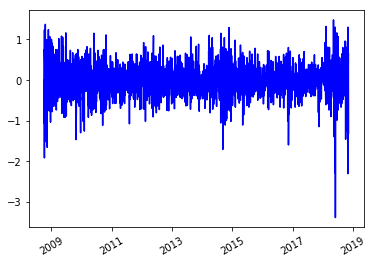

In [24]:
x = dataset_clean['DATE']
y = dataset_clean['VARIATION']

plt.plot_date(x,y, color='b',fmt="r-")
plt.xticks(rotation=30)
plt.show()

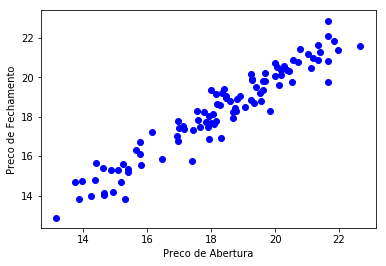

In [25]:
# Faz uma cópia da base de dados
sample = dataset_clean.copy()
# Seleciona os 100 primeiros valores de abertura
x = sample.OPEN[:100]
# Seleciona os 100 primeiros valores de fechamento
y = sample.CLOSE[:100]
# Plota o grafico resultante
plt.scatter(x, y, color='b')
plt.xlabel('Preco de Abertura')
plt.ylabel('Preco de Fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

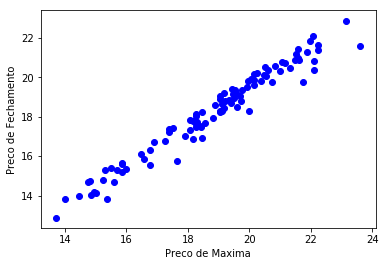

In [26]:
# Seleciona os 100 primeiros valores de maxima
x = sample.HIGH[:100]

plt.scatter(x, y, color='b')
plt.xlabel('Preco de Maxima')
plt.ylabel('Preco de Fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

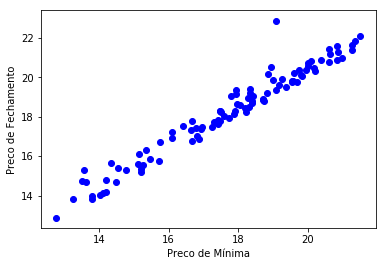

In [27]:
# Seleciona os 100 primeiros valores de minima
x = sample.LOW[:100]
# Plota o grafico resultante
plt.scatter(x, y, color='b')
plt.xlabel(u'Preco de Mínima')
plt.ylabel(u'Preco de Fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

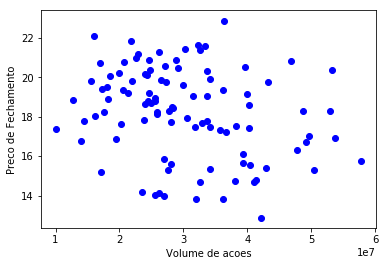

In [28]:
# Seleciona os 100 primeiros valores de volume
x = sample.VOL[:100]
# Plota o grafico resultante
plt.scatter(x, y, color='b')
plt.xlabel('Volume de acoes')
plt.ylabel('Preco de Fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

In [29]:
# Separa a classe de interesse em um novo dataframe
target = dataset_clean.CLOSE

# Variaveis independentes sao incorporados ao dataframe "independent_var"
features = ['DATE','OPEN','HIGH','LOW','VOL']
independent_var = dataset_clean[features]

In [30]:
# Cria as variaveis de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(independent_var, target, test_size=0.2, shuffle=False)

In [31]:
# Cria um modelo de regressao linear
lm = linear_model.LinearRegression()
model = lm.fit(X_train[['OPEN', 'HIGH', 'LOW', 'VOL']], Y_train)
# Realiza a predicao
predictions = lm.predict(X_test[['OPEN', 'HIGH', 'LOW', 'VOL']])
predictions = np.round(predictions, 2)
r2 = r2_score(Y_test, predictions)

resultset = {
    'DATE' : X_test['DATE'],
    'OPEN' : X_test['OPEN'].ravel(),
    'HIGH' : X_test['HIGH'].ravel(),
    'LOW'  : X_test['LOW'].ravel(),
    'VOL'  : X_test['VOL'].ravel(),
    'REAL' : Y_test.ravel(),
    'PREDICTED' : predictions,
    'ERROR': Y_test.ravel() - predictions
}

pd.DataFrame(data=resultset).head(n=30)

,DATE,ERROR,HIGH,LOW,OPEN,PREDICTED,REAL,VOL
1996,2016-10-31,-0.10,18.10,17.54,17.96,17.72,17.62,42059100
1997,2016-11-01,0.06,17.81,16.50,17.81,16.74,16.80,68718800
1998,2016-11-03,-0.41,16.97,16.07,16.57,16.48,16.07,56998700
1999,2016-11-04,-0.10,16.52,15.85,16.41,16.03,15.93,61347700
2000,2016-11-07,0.10,17.14,16.65,16.65,17.04,17.14,51625300
2001,2016-11-08,-0.05,17.41,16.67,17.04,17.03,16.98,56241000
2002,2016-11-09,-0.19,17.04,15.75,15.79,16.78,16.59,111417100
2003,2016-11-10,-0.35,17.11,15.44,17.04,15.79,15.44,94683900
2004,2016-11-11,-0.38,15.40,13.89,15.12,14.34,13.96,129811400
2005,2016-11-14,0.28,14.13,13.28,13.75,13.67,13.95,86623000


In [32]:
print('R2_Score: ', r2)

('R2_Score: ', 0.9978770673904854)
